## 刀具磨损状态分类识别
### 数据描述
CNC铣削数据集-密歇根大学智能实验室   

2018年四月  

在密歇根大学系统级制造和自动化研究试验台（SMART）的CNC铣床中，在2“x2”x1.5“蜡块上进行了一系列机加工实验。加工数据是从CNC机上收集的每个工具都制作了一个成品形状为“S”形的成品蜡零件-用于智能制造的S-刻在顶面上，如test_artifact.jpg所示。    


该数据集可用于分类研究，例如：  

1. 刀具磨损检测  
可以执行监督的二进制分类，以识别磨损和未磨损的切削刀具。使用未磨损的工具进行了八次实验，而使用磨损的工具进行了十次实验（有关指示，请参见tool_condition列）。    
2. 检测夹紧不良  
该数据可用于检测何时没有足够的压力将工件固定在虎钳中以通过目视检查（请参见passed_visual_inspection列以查看目视缺陷）。在2.5、3.0和4.0 bar的压力下进行实验。该数据还可用于检测条件何时足够关键，以至于无法完成加工操作（有关安全性的原因，何时提前停止加工的信息，请参见processing_completed列）。    


来自train.csv的总共18个不同实验的一般数据包括：  

>输入（功能）
No：实验编号  
material ：蜡  
feed_rate：切削刀具沿工件的相对速度（mm/s）  
clamp_pressure：用于将工件保持在虎钳中的压力（bar）  

>输出（预测）  
tool_condition：未使用和已磨损工具的标签  
machining_completed：用于指示是否在没有将工件移出气动虎钳的情况下完成机械加工的指示器  
pass_visual_inspection：指示工件是否通过外观检查的指示器，仅适用于完成加工的实验  


时间序列数据是从18个实验中以100毫秒的采样率收集的，分别记录在“ experiment_01.csv”到“ experiment_18.csv”文件中。每个文件都有来自CNC中的4个电机（X，Y，Z轴和主轴）的测量值。这些CNC测量可以以两种方式使用：  
1. 将每个CNC测量值作为独立观察值，在Machining_Process列中给出正在执行的操作。有效的加工操作标记为“第1层向上”，“第1层向下”，“第2层向上”，“第2层向下”，“第3层向上”和“第3层向下”。   
2. 以18个实验（整个时间序列）中的每一个作为时间序列分类的观察值。      

加工数据集中可用的功能有：  

|参数|意义|
| ---- | ---- |
|X1_ActualPosition|零件的实际x位置（mm）|  
|X1_ActualVelocity|零件的实际x速度（mm / s）|    
|X1_ActualAcceleration|零件的实际x加速度（mm / s / s）|     
|X1_CommandPosition|参考x零件位置（mm）|  
|X1_CommandVelocity|参考x零件速度（mm / s）|  
|X1_CommandAcceleration|参考x零件加速度（mm / s / s）|  
|X1_CurrentFeedback|电流（A）|  
|X1_DCBusVoltage|电压（V）|  
|X1_OutputCurrent|电流（A）|  
|X1_OutputVoltage|电压（V）|  
|X1_OutputPower|功率（kW）|  
|Y1_ActualPosition|零件的实际y位置（毫米）|  
|Y1_ActualVelocity|零件的实际y速度（mm / s）|  
|Y1_ActualAcceleration|零件的实际y加速度（mm / s / s）|  
|Y1_CommandPosition|零件的参考y位置（毫米）|  
|Y1_CommandVelocity|零件的参考y速度（mm / s）|  
|Y1_CommandAcceleration|零件的参考y加速度（mm / s / s）|  
|Y1_CurrentFeedback|电流（A）|  
|Y1_DCBusVoltage|电压（V）|  
|Y1_OutputCurrent|电流（A）|  
|Y1_OutputVoltage|电压（V）|  
|Y1_OutputPower|功率（kW）|   
|Z1_ActualPosition|零件的实际z位置（毫米）|  
|Z1_ActualVelocity|零件的实际z速度（mm / s）|  
|Z1_ActualAcceleration|零件的实际z加速度（mm / s / s）|  
|Z1_CommandPosition|零件的参考z位置（毫米）|  
|Z1_CommandVelocity|零件的参考z速度（mm / s）|  
|Z1_CommandAcceleration|参考零件的z加速度（mm / s / s）|  
|Z1_CurrentFeedback|电流（A）|  
|Z1_DCBusVoltage|电压（V）|  
|Z1_OutputCurrent|电流（A）|  
|Z1_OutputVoltage|电压（V）|  
|S1_ActualPosition|主轴的实际位置（毫米）|  
|S1_ActualVelocity|主轴的实际速度（mm / s）|  
|S1_ActualAcceleration|主轴的实际加速度（mm / s / s）|  
|S1_CommandPosition|主轴的参考位置（毫米）|  
|S1_CommandVelocity|主轴参考速度（mm / s）|  
|S1_CommandAcceleration|主轴参考加速度（mm / s / s）|  
|S1_CurrentFeedback|电流（A）|  
|S1_DCBusVoltage|电压（V）|  
|S1_OutputCurrent|电流（A）|  
|S1_OutputVoltage|电压（V）| 
|S1_OutputPower|电流（A）|  
|S1_SystemInertia|转矩惯量（kg * m ^ 2）|  
|M1_CURRENT_PROGRAM_NUMBER|程序在CNC上列出的编号|  
|M1_sequence_number|正在执行的G代码行|  
|M1_CURRENT_FEEDRATE|主轴的瞬时进给速度| 
|Machining_Process|当前正在执行的加工阶段|  

### 读取数据

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
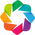

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from matplotlib import pyplot as plt
from minisom import MiniSom
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

### 加载数据集

In [3]:
ex_result = pd.read_csv("/home/liu/Documents/data/tool_data/train.csv")
print('>> shape of train.csv:',ex_result.shape)
ex_result.head(5)

>> shape of train.csv: (18, 7)


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


补齐缺失值  
实验结果中passed_visual_inspection中的NaN表示Machining_finalized为否，这意味着加工过程未正确完成并且未进行目测过程。因此，我们需要用No填充NaN。

In [4]:
ex_result['passed_visual_inspection'] = ex_result['passed_visual_inspection'].fillna('no')

加载实验数据

In [5]:
ex_data = pd.read_csv("/home/liu/Documents/data/tool_data/experiment_01.csv")
print('>> shape of experiment_01.csv',ex_data.shape)
ex_data.head(5)

>> shape of experiment_01.csv (1055, 48)


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


将1-18个实验数据和结果整合为一个总的数据集

In [6]:
frames = []
for i in range(1,19):
    #load files
    exp_num = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv(f"/home/liu/Documents/data/tool_data/experiment_{exp_num}.csv")

    #load each experiment result row
    exp_result_row = ex_result[ex_result['No'] == i]
    frame['exp_num'] = i

    #add experiment settings to features
    frame['material'] = exp_result_row.iloc[0]['material']
    frame['feedrate'] = exp_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = exp_result_row.iloc[0]['clamp_pressure']
    
    #add experiment result to features
    frame['tool_condition'] = exp_result_row.iloc[0]['tool_condition']
    frame['machining_finalized'] = exp_result_row.iloc[0]['machining_finalized']
    frame['passed_visual_inspection'] = exp_result_row.iloc[0]['passed_visual_inspection']

    frames.append(frame)

df = pd.concat(frames, ignore_index = True)
df.head(5)

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_num,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes


将类别型编码变换为独热码

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
df['tool_condition'] = enc.fit_transform(df[['tool_condition']]).astype(int) 
df['tool_condition']

0        1
1        1
2        1
3        1
4        1
        ..
25281    0
25282    0
25283    0
25284    0
25285    0
Name: tool_condition, Length: 25286, dtype: int64

统一标签

In [8]:
df['Machining_Process'].value_counts().sort_index()

End              2585
Layer 1 Down     2655
Layer 1 Up       4085
Layer 2 Down     2528
Layer 2 Up       3104
Layer 3 Down     2354
Layer 3 Up       2794
Prep             1795
Repositioning    3377
Starting            1
end                 8
Name: Machining_Process, dtype: int64

仅在experimet_1中，Machining_Process列中的开始标签计数为1  
仅在experimet_1中，Machining_Process列中的结束标签数为8

In [9]:
df.replace({'Machining_Process': {'Starting':'Prep','end':'End'}}, inplace=True)
df.head(5)

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_num,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Prep,1,wax,6,4.0,1,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,1,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,1,yes,yes
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,1,yes,yes
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,1,yes,yes


### EDA探索性数据分析
* 加工过程独特
* 速度、电压、进给率的平均值(x、y、z)
* 进料、夹紧压力分布
* 各特征的相关性
* 每个实验的时间序列图
* 每个输出特征的分布差异

****

##### 单边量分析
加工材料只有一个类型,所以不应用于特征工程
1. Machining Process

In [10]:
hv.Bars(df['Machining_Process'].value_counts()).opts(title="Machining Process Count", color="red", xlabel="Machining Processes", ylabel="Count")\
                                        .opts(opts.Bars(width=500, height=300,tools=['hover'],xrotation=45,show_grid=True))

:Bars   [index]   (Machining_Process)

舍去不需要的特征量

In [11]:
data = df.drop(['tool_condition','machining_finalized','passed_visual_inspection',\
                'material','feedrate','clamp_pressure','exp_num'],axis=1)

将类型编码改为独热码

In [12]:
data['Machining_Process'] = enc.fit_transform(data[['Machining_Process']])

进行归一化处理

In [13]:
from sklearn.preprocessing import Normalizer
data = Normalizer().fit_transform(data)

划分数据集

In [14]:
X = data
y = df['tool_condition'].values
# 划分训练集、测试集  7:3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


### 训练模型
选择miniSOM库来训练Som模型

In [15]:
N = X_train.shape[0] #样本数量
M = X_train.shape[1] #维度/特征数量

#设置超参数
size = math.ceil(np.sqrt(5 * np.sqrt(N)))  # 经验公式：决定输出层尺寸
print("训练样本个数:{}  测试样本个数:{}".format(N,X_test.shape[0]))
print("输出网格最佳边长为:",size)

max_iter = 1000

# 初始化训练
som = MiniSom(size, size, M, sigma=1.9, learning_rate=2, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=1)

#初始化权值
#som.random_weights_init(X_train)
som.pca_weights_init(X_train)

#网络训练
som.train_batch(X_train, max_iter, verbose=True)
#som.train_random(X_train, max_iter, verbose=False)

训练样本个数:17700  测试样本个数:7586
输出网格最佳边长为: 26
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06514369114160246


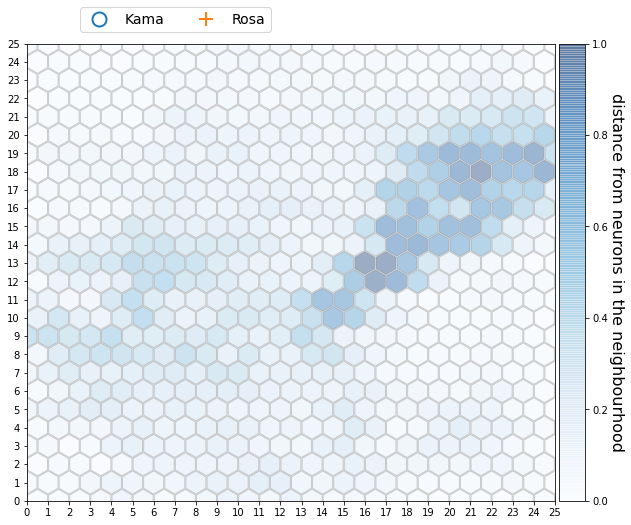

In [16]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)]*2/np.sqrt(3)*3/4
        hex = RegularPolygon((xx[(i, j)], wy), numVertices=6, radius=.95/np.sqrt(3),
                      facecolor=cm.Blues(umatrix[i, j]), alpha=.4, edgecolor='gray')
        ax.add_patch(hex)

#markers = ['o', '+']
#colors = ['C0', 'C1']
#for cnt, x in enumerate(X_train):
#    w = som.winner(x)  # getting the winner
#    # palce a marker on the winning position for the sample xx
#    wx, wy = som.convert_map_to_euclidean(w) 
#    wy = wy*2/np.sqrt(3)*3/4
#    plt.plot(wx, wy, markers[y_train[cnt]-1], markerfacecolor='None',
#             markeredgecolor=colors[y_train[cnt]-1], markersize=12, markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange*2/np.sqrt(3)*3/4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Kama',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Rosa',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left',
          borderaxespad=0., ncol=2, fontsize=14)
### plt.savefig('resulting_images/som_seed_hex.png')
plt.show()

### 分类

In [17]:
winmap = som.labels_map(X_train,y_train)

labels_map利用标签信息，标注训练好的Som网络,取频率最高的类别，作为该神经元的类别标签；或许，你也可以用各个类的频率估计概率密度

In [18]:
def classify(som,data,winmap):
    from numpy import sum as npsum
    default_class = npsum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

### 输出混淆矩阵

In [19]:
y_pred = classify(som,X_test,winmap)
print(classification_report(y_test, np.array(y_pred)))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67      3960
           1       0.63      0.60      0.62      3626

    accuracy                           0.64      7586
   macro avg       0.64      0.64      0.64      7586
weighted avg       0.64      0.64      0.64      7586



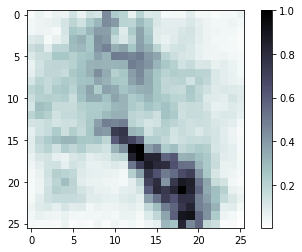

In [20]:
heatmap = som.distance_map()  #生成U-Matrix
plt.imshow(heatmap, cmap='bone_r')      #miniSom案例中用的pcolor函数,需要调整坐标
plt.colorbar()

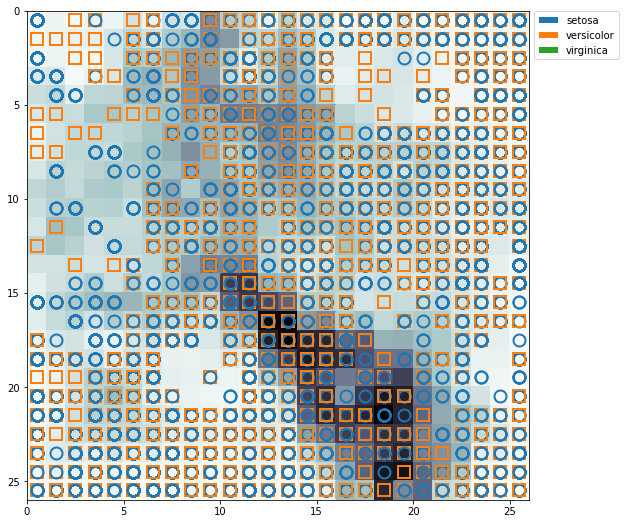

In [21]:
from matplotlib.patches import Patch
plt.figure(figsize=(9, 9))
# 背景上画U-Matrix
heatmap = som.distance_map()
plt.pcolor(heatmap, cmap='bone_r')  # plotting the distance map as background

# 定义不同标签的图案标记
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
category_color = {'setosa': 'C0',
                  'versicolor': 'C1',
                  'virginica': 'C2'}
for cnt, xx in enumerate(X_train):
    w = som.winner(xx)  # getting the winner
    # 在样本Heat的地方画上标记
    plt.plot(w[0]+.5, w[1]+.5, markers[y_train[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y_train[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, size, 0, size])
ax = plt.gca()
ax.invert_yaxis() #颠倒y轴方向
legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

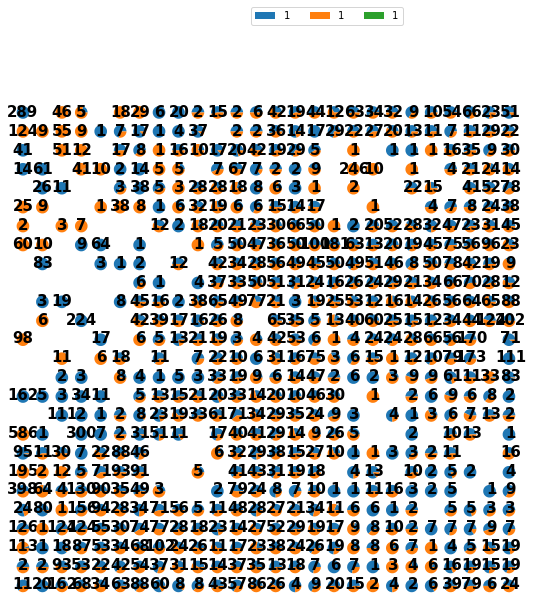

In [22]:
label_name_map_number = {"setosa":0,"versicolor":1,"virginica":2}

from matplotlib.gridspec import GridSpec
plt.figure(figsize=(9, 9))
the_grid = GridSpec(size, size)
for position in winmap.keys():
    label_fracs = [winmap[position][label] for label in [0,1,2]]
    plt.subplot(the_grid[position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
    plt.text(position[0]/100, position[1]/100,  str(len(list(winmap[position].elements()))),
              color='black', fontdict={'weight': 'bold',  'size': 15},
              va='center',ha='center')
plt.legend(patches, df.tool_condition, loc='center right', bbox_to_anchor=(-1,9), ncol=3)
plt.show()